In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import torch

import pyro

from rethinking import LM

plt.rcParams["axes.labelsize"] = "large"
plt.rcParams["lines.linewidth"] = 1
pyro.enable_validation()
pyro.set_rng_seed(0)

#### Code 0.1

In [2]:
print("All models are wrong, but some are useful.")

All models are wrong, but some are useful.


#### Code 0.2

In [3]:
x = torch.arange(1., 3)
x = x * 10
x = x.log()
x = x.sum()
x = x.exp()
x

tensor(200.0000)

#### Code 0.3

In [4]:
print(torch.tensor(0.01).pow(200).log())
print(200 * torch.tensor(0.01).log())

tensor(-inf)
tensor(-921.0341)


#### Code 0.4

{'intercept': tensor(-17.6297), 'speed': tensor(3.9357), 'sigma': tensor(15.0752)}


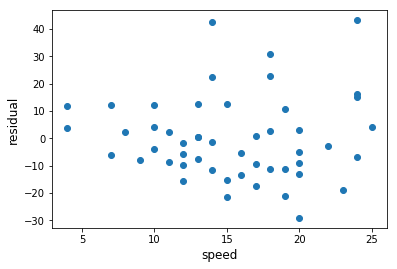

In [5]:
# Load the data:
# car braking distances in feet paired with speeds in km/h
# see cars.info() for details
cars = pd.read_csv("../data/cars.csv", index_col=0)
cars_speed = torch.tensor(cars["speed"].values, dtype=torch.float)
cars_dist = torch.tensor(cars["dist"].values, dtype=torch.float)

# fit a linear regression of distance on speed
m = LM("m", speed=cars_speed, dist=cars_dist)
m.fit()

# estimated coefficients from the model
print(m.coef())

# plot residuals against speed
resid = cars_dist - (m.coef()["intercept"] + m.coef()["speed"] * cars_speed)
plt.plot(cars_speed.tolist(), resid.tolist(), "o")
plt.xlabel("speed")
plt.ylabel("residual");

#### Code 0.5

In [6]:
#!pip install jupyter matplotlib pandas pyro-ppl torch